# Data Exploration

## Introduction
## **Objectives**
This notebook aims to perform a comprehensive data exploration process to uncover insights, identify potential data issues, and prepare for the data transformation phase. The following steps will be covered:

### **1. Dataset Overview**
- Load the dataset and display basic information
- Understand the structure, data types, and key characteristics

### **2. Missing Values Analysis**
- Identify columns with missing data
- Visualize missing data patterns
- Develop strategies for handling missing values

### **3. Duplicate Records Detection**
- Identify and analyze duplicate records
- Consider possible causes and decide on appropriate actions

### **4. Outlier Analysis**
- Identify outliers in numerical columns
- Visualize outliers using box plots
- Assess the impact of outliers on the dataset

### **5. Correlation Analysis**
- Compute correlation matrices for numerical features
- Visualize correlations using heatmaps
- Identify strong positive/negative correlations for feature engineering

### **6. Categorical Data Analysis**
- Explore the distribution of categorical features
- Visualize key trends and patterns
- Identify potential encoding strategies for modeling

### **7. Date/Time Data Analysis**
- Investigate patterns in date/time features
- Extract relevant insights for potential feature engineering

### **8. Initial Observations & Key Insights**
- Summarize key findings
- Document important insights to guide further data transformation and modeling steps



## Setup

### Data Loading

In [ ]:
!pip install python-dotenv google-api-python-client
!git clone https://github.com/vmagdale2/Data-Transformation-Linear-Regression.git

import sys
sys.path.append('/content/Data-Transformation-Linear-Regression/src')
%cd /content/Data-Transformation-Linear-Regression/src
!pwd
!ls

from utils import authenticate_and_load_env, load_data_from_drive
from google.colab import drive
drive.mount('/content/drive')

import os
env_content = """

"""
with open("/content/.env", "w") as f:
    f.write(env_content.strip())

from dotenv import load_dotenv
load_dotenv("/content/.env")

service = authenticate_and_load_env()

file_id = os.getenv("GDRIVE_FILE_ID")
if not file_id:
    raise ValueError("❌ Error: 'GDRIVE_FILE_ID' is missing or invalid in your .env file.")

data = load_data_from_drive(service, file_id)
print("✅ Data loaded successfully!" if data is not None else "❌ Failed to load data.")


Cloning into 'Data-Transformation-Linear-Regression'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 21), reused 33 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 19.63 KiB | 9.81 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/Data-Transformation-Linear-Regression/src
/content/Data-Transformation-Linear-Regression/src
data_preprocessing.py  evaluation.py  feature_engineering.py  model.py	utils.py
Mounted at /content/drive
✅ Google Drive API authenticated successfully!
✅ Data loaded successfully!


### Install and Imports

In [ ]:
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Professional/Portfolio/Transformations/training_data.csv')

# Dataset Overview

In [ ]:
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
display(df.describe().T)
print("\nUnique Value Counts:")
display(df.nunique())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000



Unique Value Counts:


,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


# Missing Values Analysis

In [ ]:
print("\nNull Value Counts:")
display(df.isnull().sum())


Null Value Counts:


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Duplicate Records Detection

In [ ]:
duplicates = df.duplicated().sum()
print(f"Total Duplicates Identified: {duplicates}")

Total Duplicates Identified: 0


# Outlier Analysis

<Figure size 1200x600 with 0 Axes>

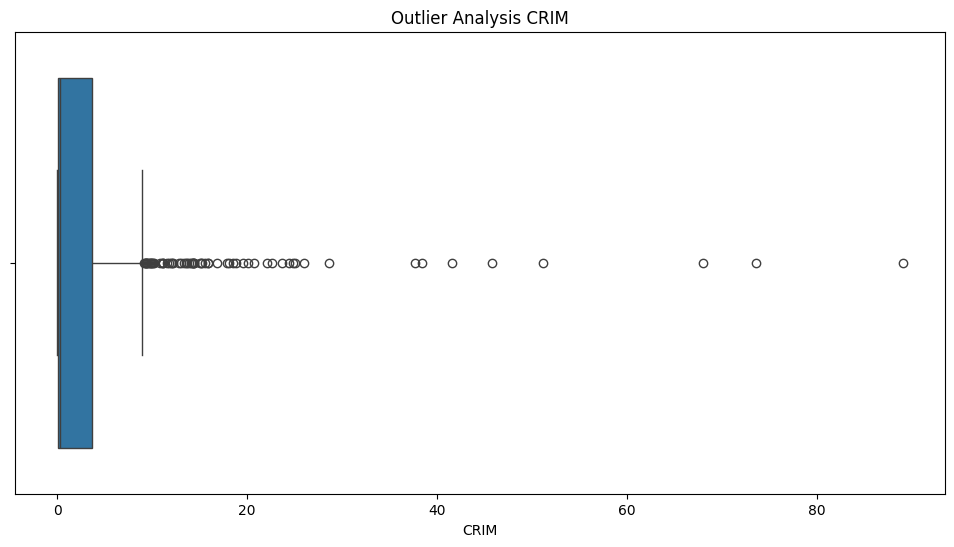

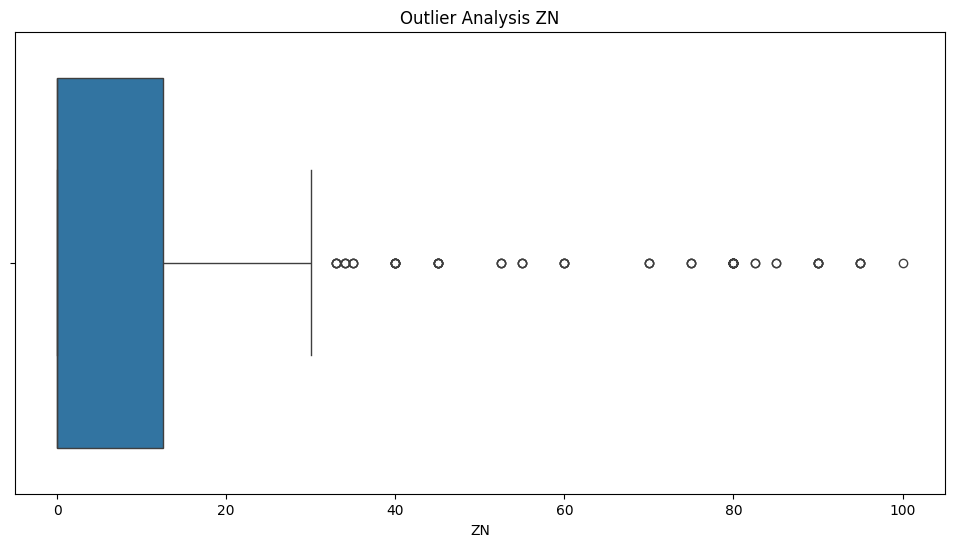

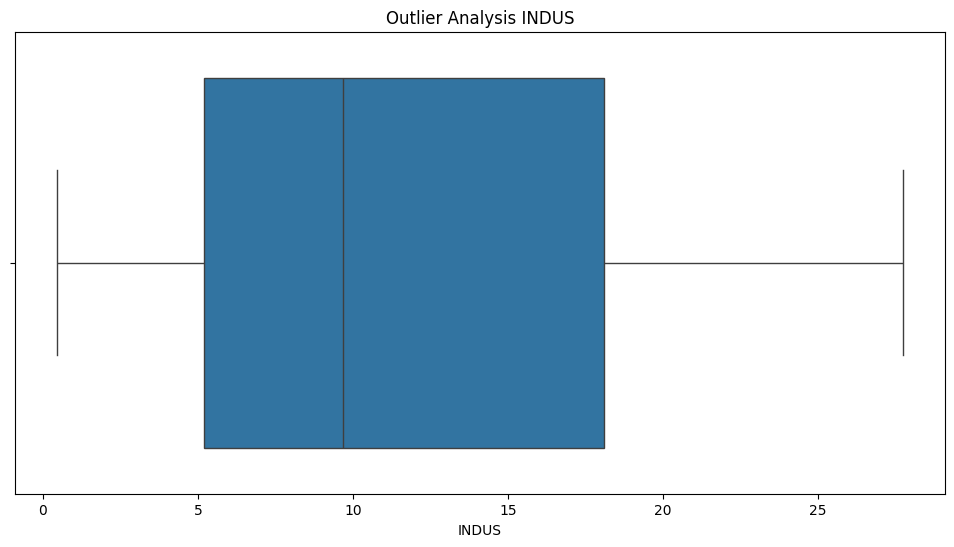

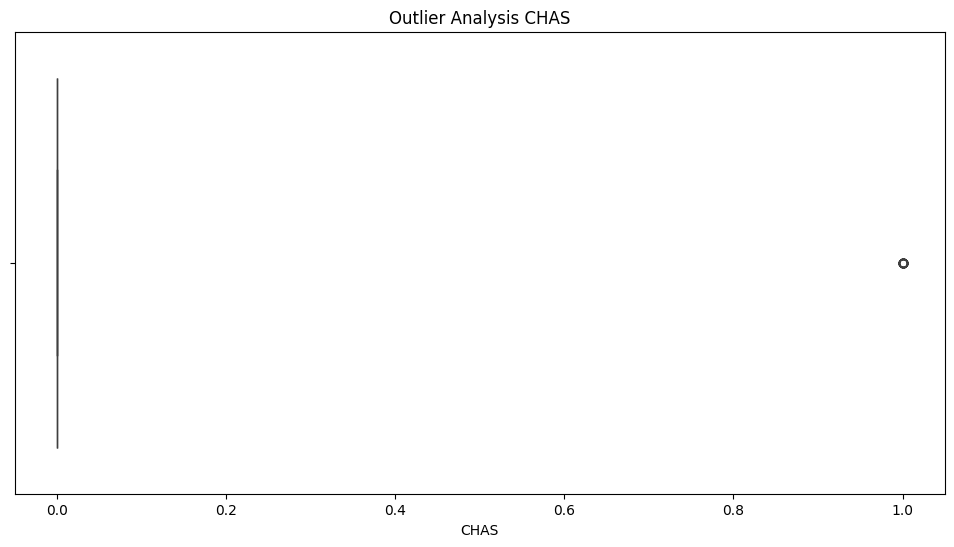

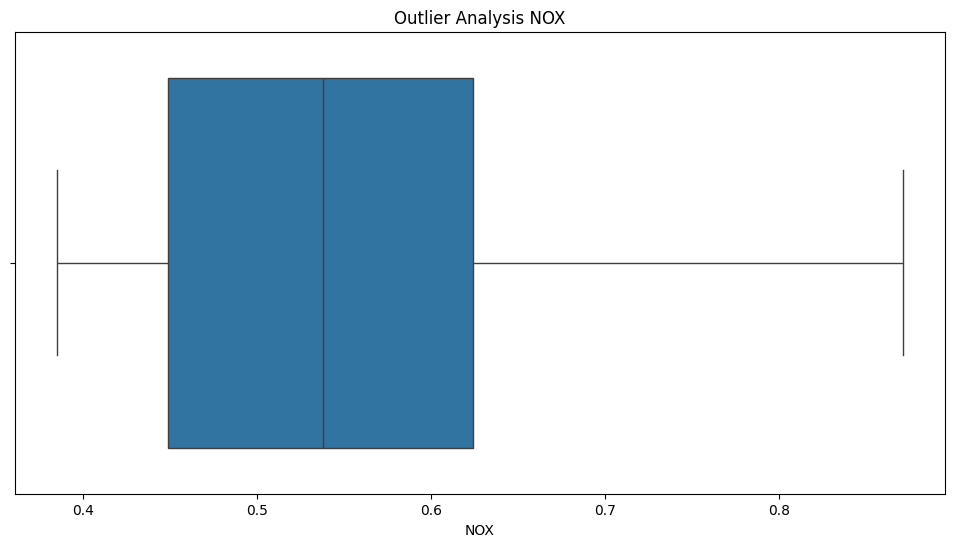

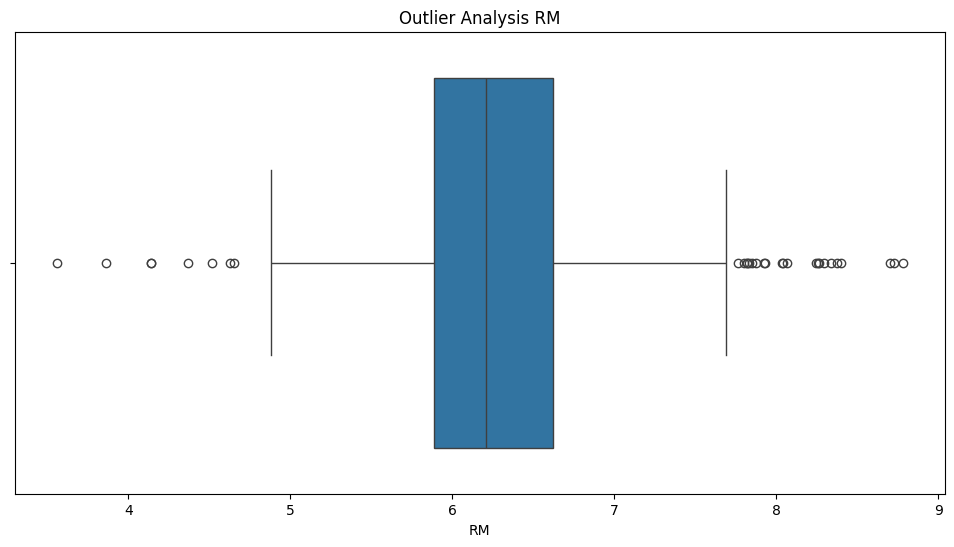

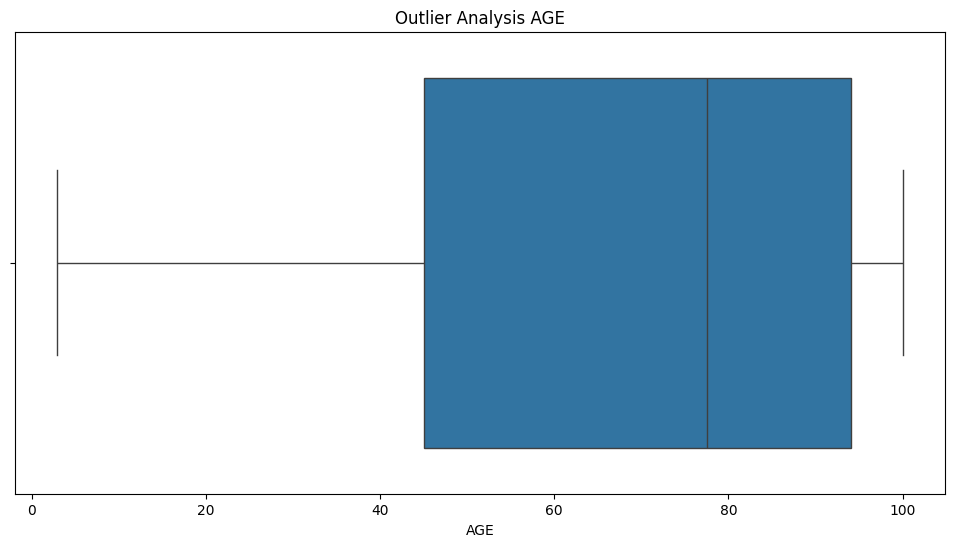

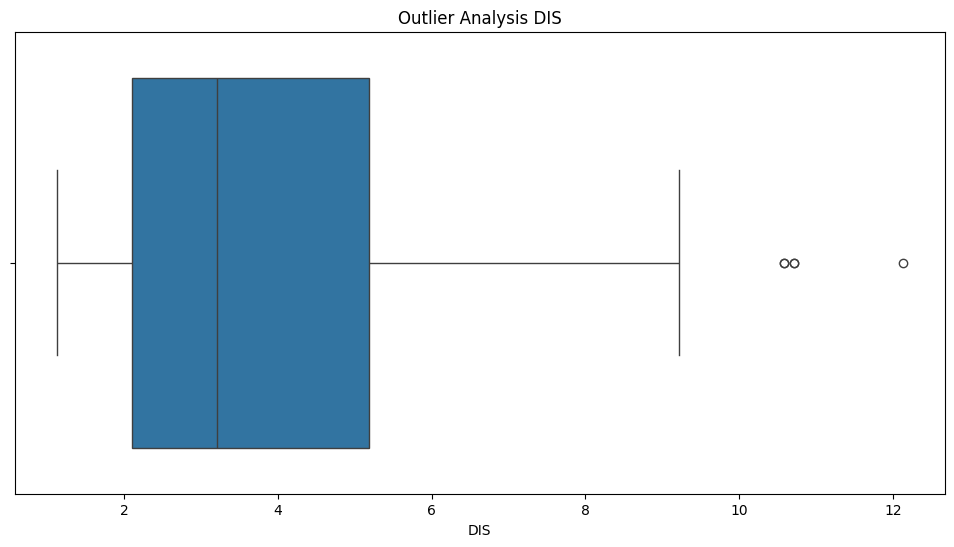

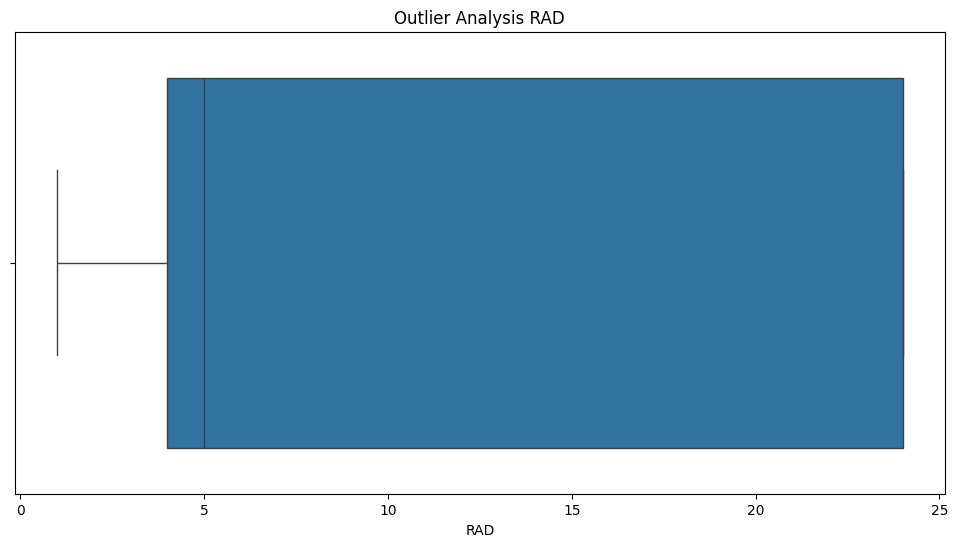

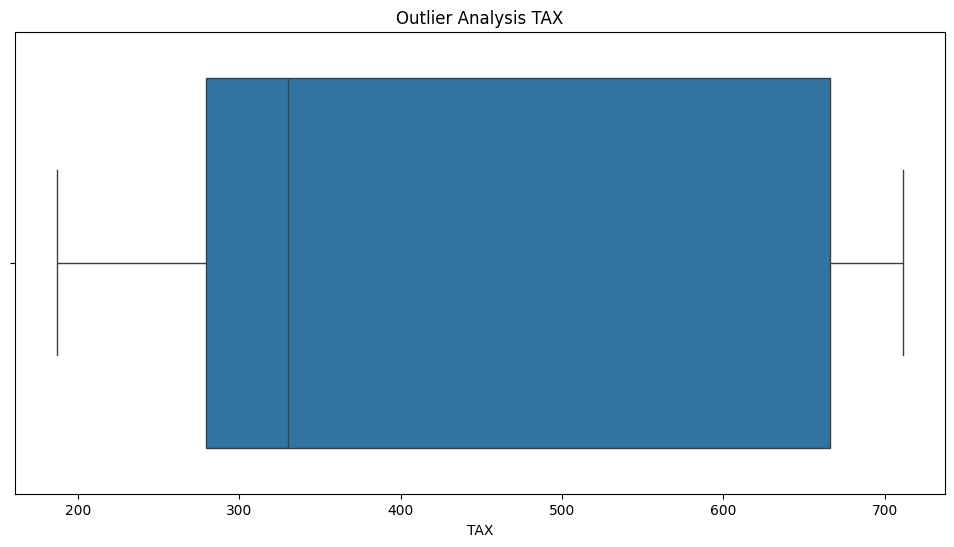

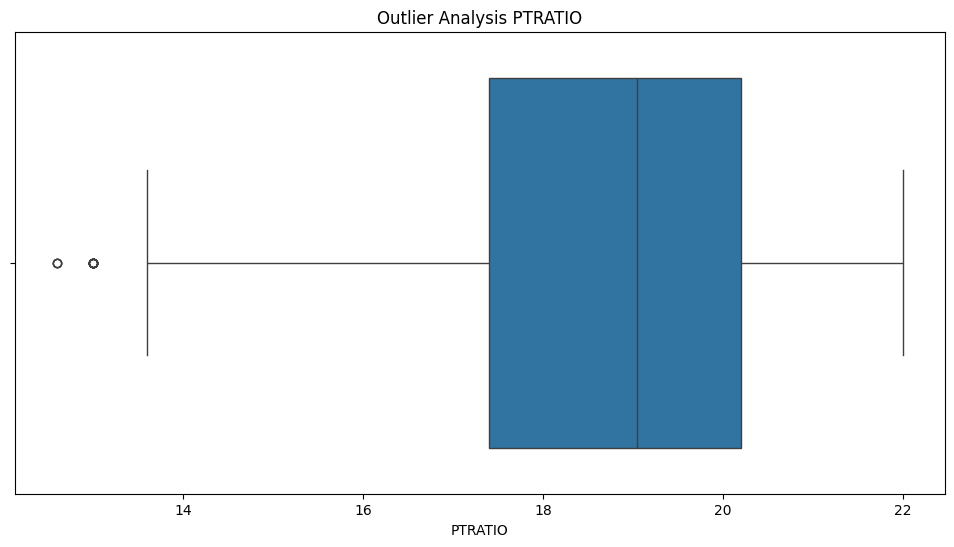

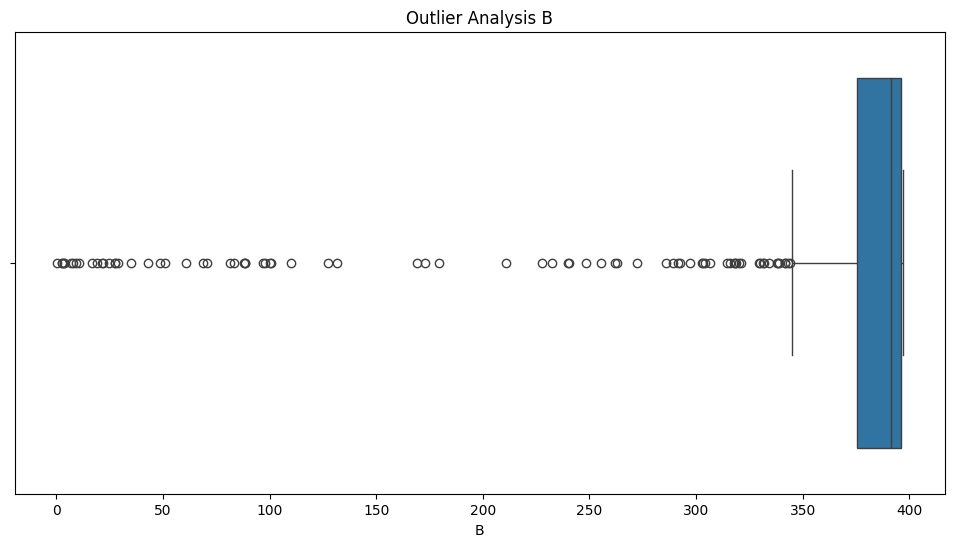

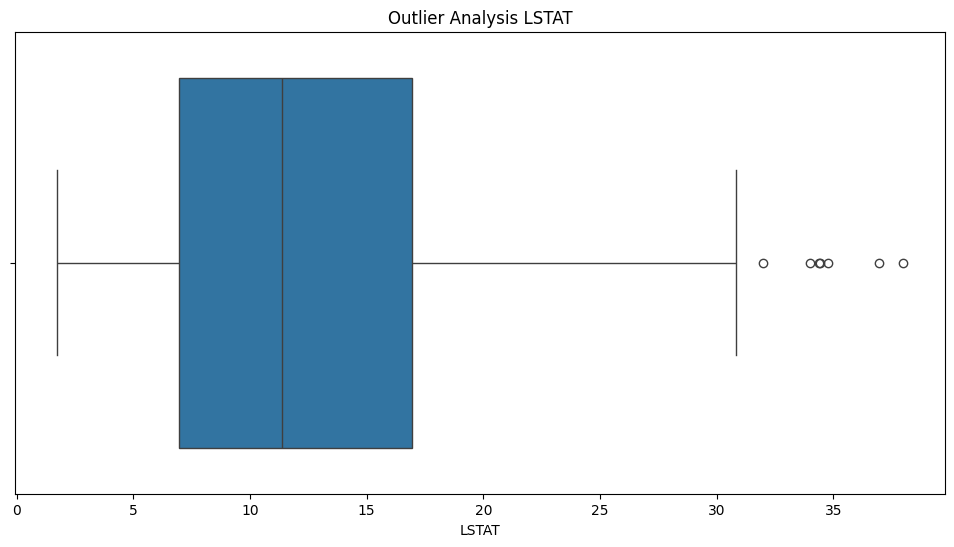

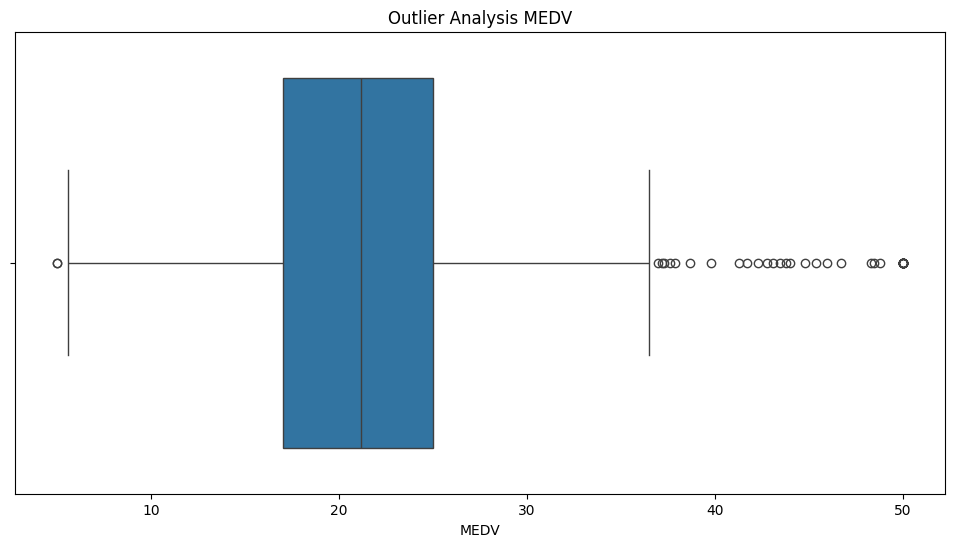

In [ ]:
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Outlier Analysis {column}')
    plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier Counts per Column:")
display(outliers)


Outlier Counts per Column:


,0
CRIM,65
ZN,68
INDUS,0
CHAS,35
NOX,0
RM,30
AGE,0
DIS,5
RAD,0
TAX,0


# (Feature Relationships) Correlation Analysis


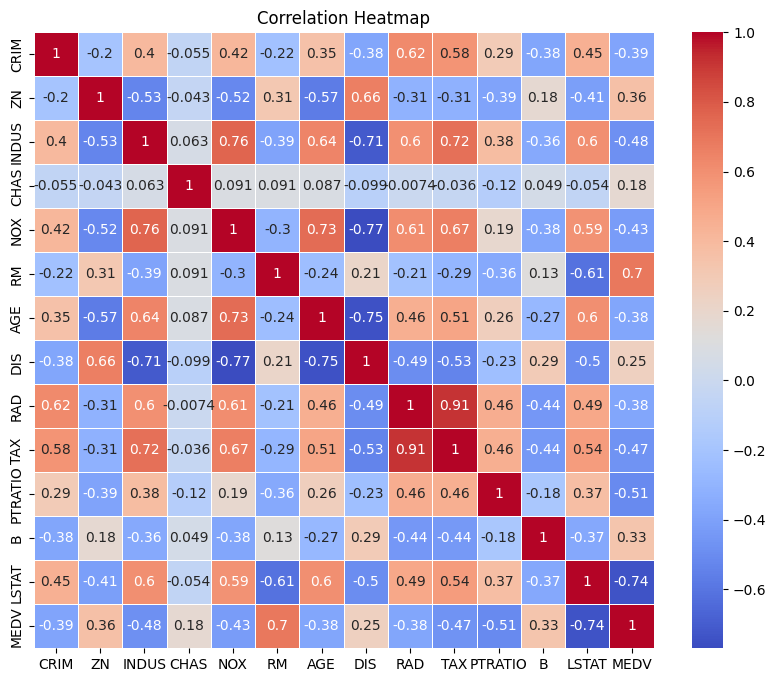

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

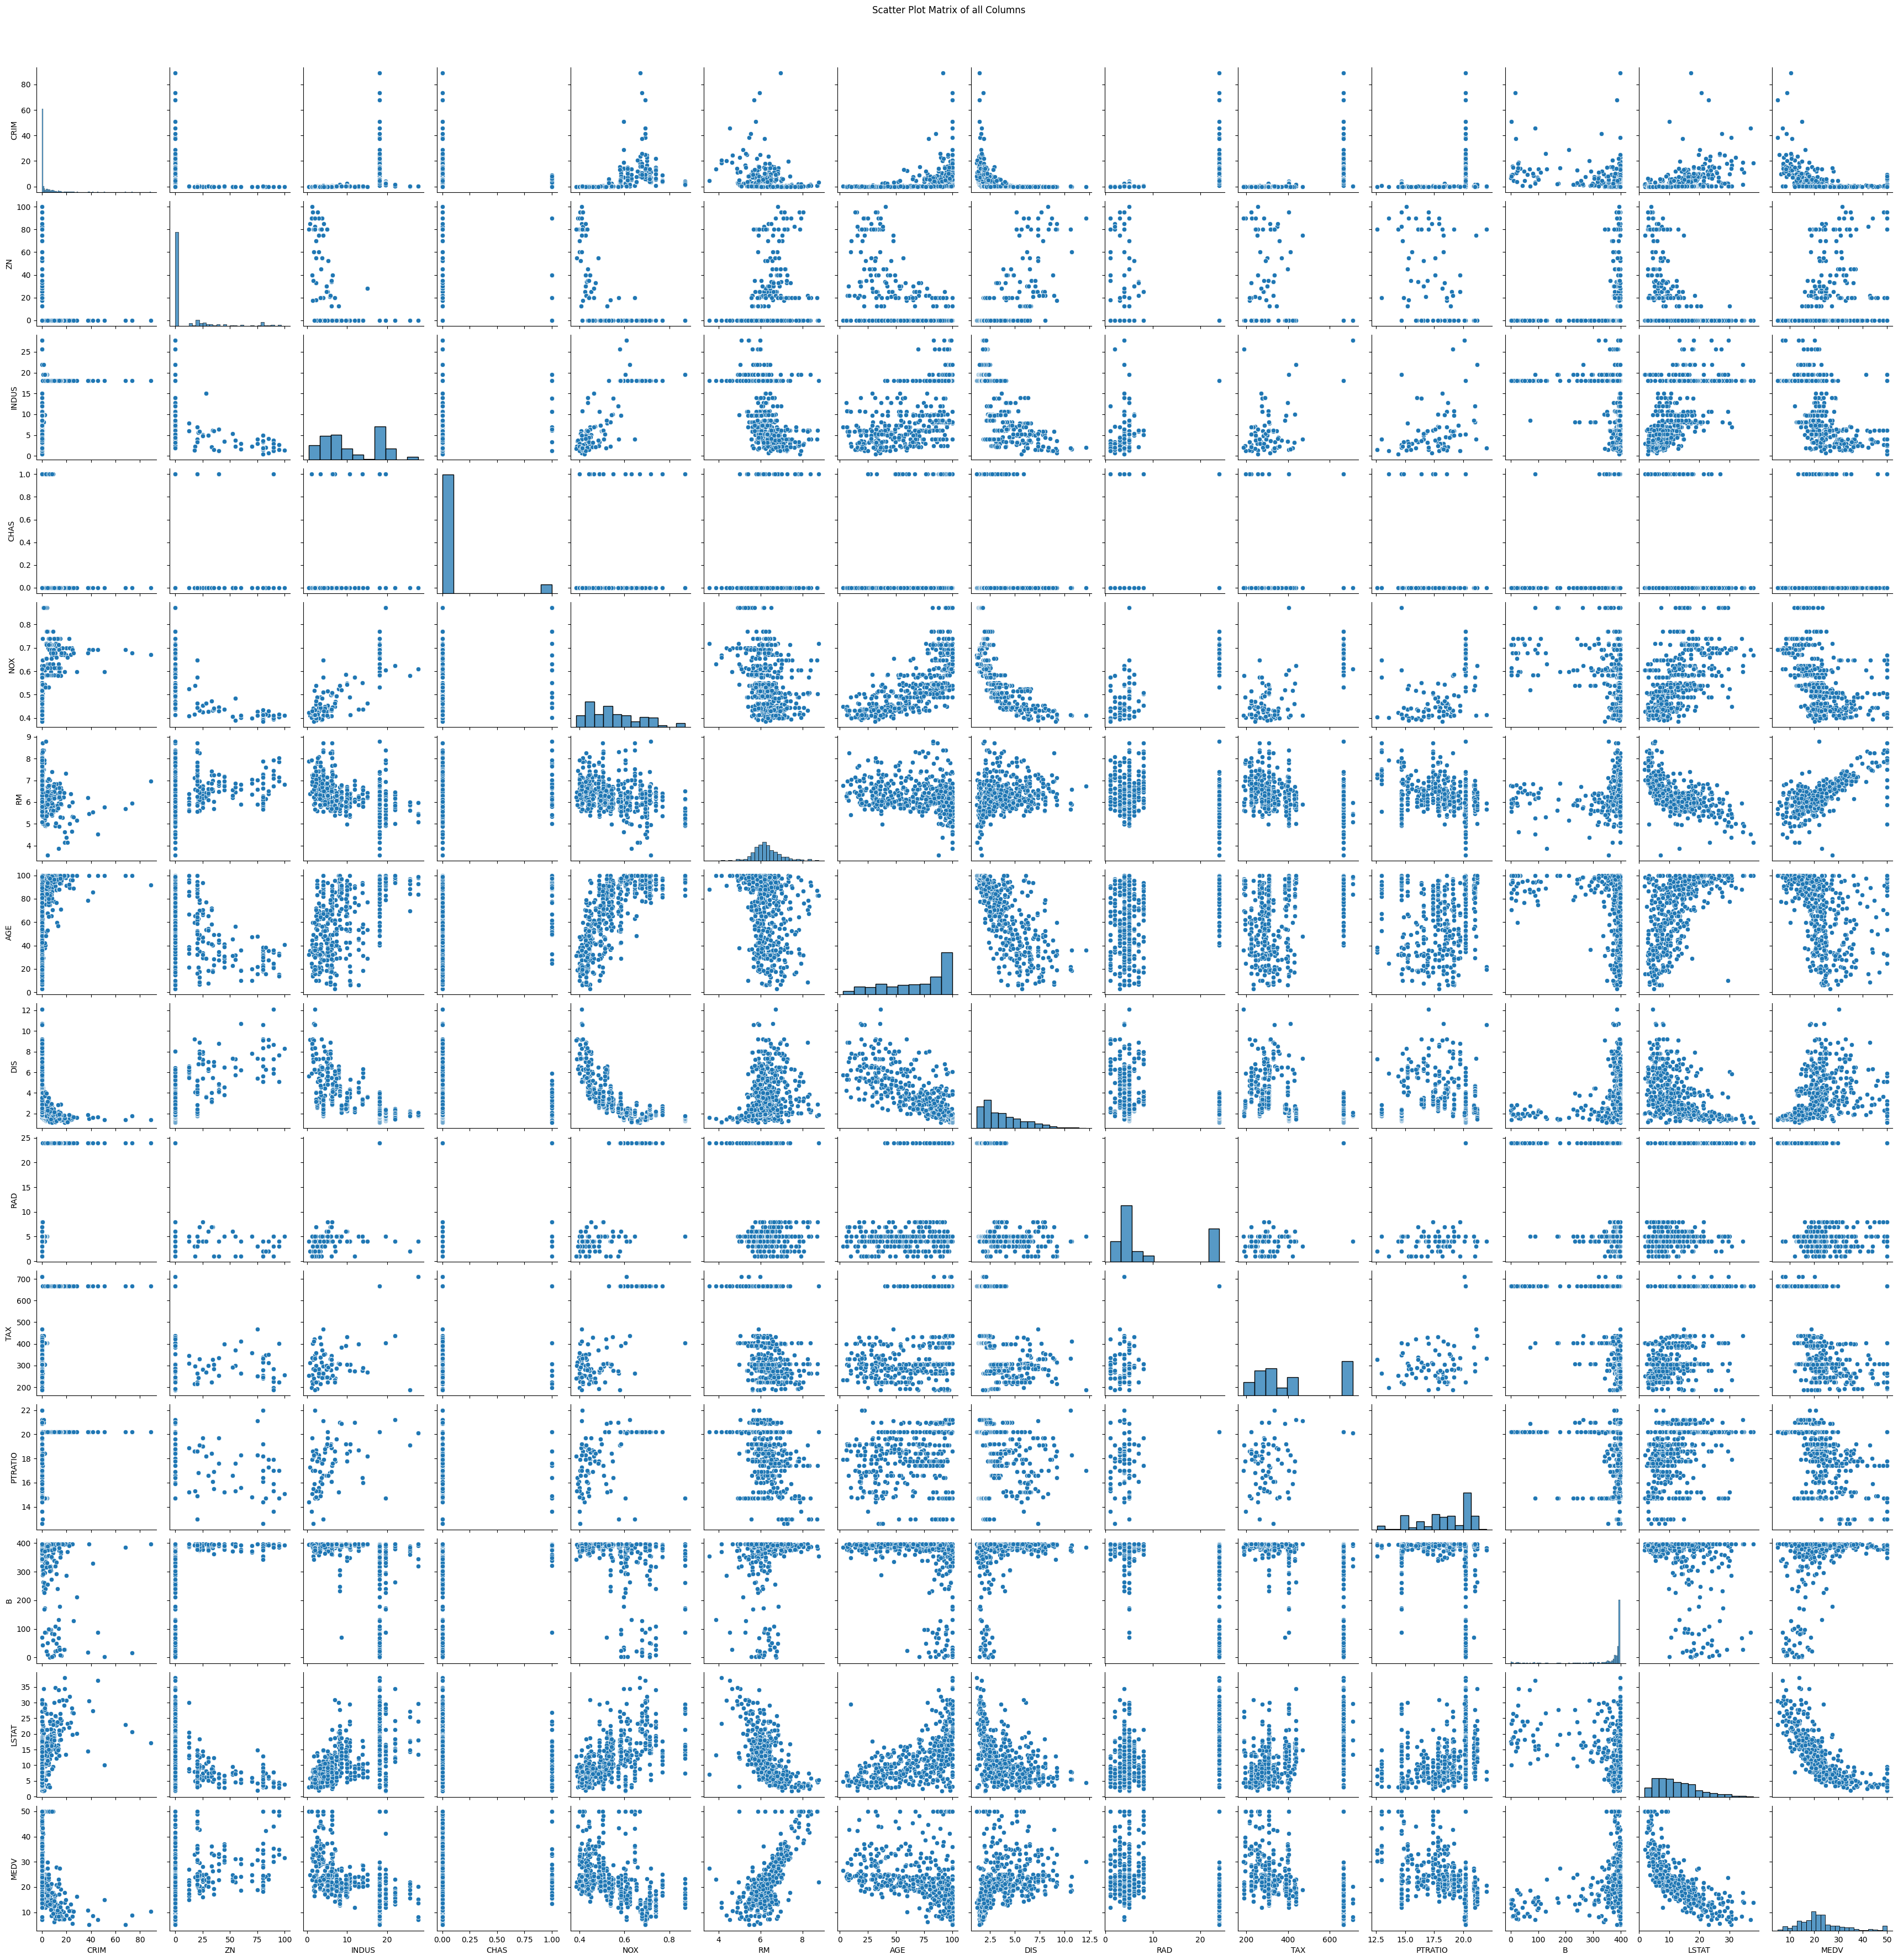

In [ ]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix of all Columns', y=1.02) # Add a title to the entire plot
plt.show()

# Key Findings

# **Key Findings & Insights**

## **1. Dataset Overview**
- **Total Rows:** `506`
- **Total Columns:** `13`
- **Description:** The dataset includes 13 numerical features with no categorical or time-related data.

---

## **2. Missing Values Analysis**
- **Columns with Missing Data:** `0`
- **Percentage of Missing Data:** `0%`
- **Recommended Actions:** `No further action required`

---

## **3. Duplicate Records Analysis**
- **Total Duplicates Identified:** `0`
- **Key Duplicate Features/Patterns:** `None detected`
- **Recommended Actions:** `No further action required`

---

## **4. Outlier Analysis**
- **Columns with Outliers Identified:** `9`
  - `CRIM`, `ZN`, `CHAS`, `RM`, `DIS`, `PTRATIO`, `B`, `LSTAT`, `MEDV`
- **Outlier Values/Thresholds:** `To be determined`
- **Potential Impact on Analysis/Modeling:** Outliers may skew model performance and increase prediction error.
- **Recommended Actions:**
  - Investigate the nature of these outliers.
  - Consider capping/extending thresholds for extreme values or transforming data (e.g., log transformation).

---

## **5. Correlation Analysis**
- **Strong Positive Correlations:**
  - `TAX` and `RAD` at **91%** — Likely indicates a policy-driven or location-based relationship.
  - `MEDV` and `RM` — Larger homes generally have higher median values.
- **Strong Negative Correlations:**
  - `RM` and `LSTAT` — Wealthier areas tend to have larger homes and fewer residents with lower socio-economic status.
  - `DIS` and `AGE` — Newer developments are often farther from the city center.
- **Recommended Actions:** Carefully evaluate correlated features to avoid multicollinearity in regression models.

---

## **6. Categorical Data Analysis**
- **Key Categorical Features:** `None detected`
- **Recommended Actions:** `No further action required`

---

## **7. Date/Time Data Analysis**
- **Date/Time Data Present:** `No`
- **Recommended Actions:** `No further action required`

---

## **8. Summary of Key Insights**
- **Critical Issues Identified:** `None`
- **Recommended Next Steps:**
  - Dataset is relatively clean and ready for use.
  - Proceed with **data transformation** and **feature engineering** to improve model performance.

